#Alejandro Vara


In this notebook, we explore various methods aimed at cleaning the text within the questions dataset. We detail the processes we've applied or attempted for text cleaning. Additionally, we present the feature extraction techniques employed on the processed text data.

In [ ]:
!pip install pyspellchecker
!pip install unidecode
!pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.4 MB/s eta 0:00:00


## Text Cleaning

### Contraction mapping
The following dictionary is used to decontract any abbreviations or contractions that could be found in the questions

In [ ]:
contraction_mapping = {
    "a.k.a.": "also known as",
    "abt": "about",
    "acct": "account",
    "adios": "goodbye",
    "afaik": "as far as I know",
    "afk": "away from keyboard",
    "alot": "a lot",
    "ama": "ask me anything",
    "asap": "as soon as possible",
    "atm": "at the moment",
    "b/c": "because",
    "b4": "before",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bff": "best friends forever",
    "bk": "back",
    "brb": "be right back",
    "btw": "by the way",
    "cya": "see you",
    "diy": "do it yourself",
    "dm": "direct message",
    "dnd": "do not disturb",
    "e.g.": "for example",
    "etc": "et cetera",
    "fomo": "fear of missing out",
    "ftw": "for the win",
    "fyi": "for your information",
    "gtg": "got to go",
    "hmu": "hit me up",
    "hbu": "how about you",
    "idk": "I don't know",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laugh out loud",
    "lmk": "let me know",
    "nvm": "never mind",
    "omg": "oh my god",
    "omw": "on my way",
    "otp": "on the phone",
    "pls": "please",
    "ppl": "people",
    "rly": "really",
    "rn": "right now",
    "smh": "shaking my head",
    "sry": "sorry",
    "tbh": "to be honest",
    "tldr": "too long; didn't read",
    "ttyl": "talk to you later",
    "w/": "with",
    "w/o": "without",
    "wbu": "what about you",
    "wfh": "work from home",
    "wym": "what do you mean",
    "yolo": "you only live once",
    "yw": "you're welcome",
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}



### Cleaning
During the text cleaning process, we implement the following steps:
- Expand contractions and abbreviations
- Remove punctuation
- Spellchecking
- Remove stopwords
- Remove accents

Spellchecking was omitted from the process due to computational constraints. We attempted two different methods, including BKTrees and the library pyspellchecker, both of which encountered the same issue. Here both functions are presented but they have not been used on the 'train_models' notebook.

In [ ]:
import re
from collections import Counter
from spellchecker import SpellChecker
from unicodedata import normalize
import unidecode
import nltk
nltk.download('stopwords')

def expand_contractions(text, contraction_mapping=contraction_mapping):
    """
    Expand contractions and abbreviations in text.
    contraction_mapping (dict): Dictionary mapping contractions to their expanded forms.
    """
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

def remove_punctuation(text):
    """
    Remove punctuation from text.
    """
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

def spell_check(text):
    """
    Correct spelling mistakes in text using the pyspellchecker library.

    """
    # Create a SpellChecker object for English
    spell_checker = SpellChecker(language='en')

    # Perform spell checking
    corrected_text = []
    for word in text.split():
        # Get the correction for the word
        corrected_word = spell_checker.correction(word)
        if corrected_word is not None:
            # If correction is not None, use it
            corrected_text.append(corrected_word)
        else:
            # If correction is None, keep the original word
            corrected_text.append(word)

    # Join the corrected words back into a single string
    corrected_text = ' '.join(corrected_text)

    return corrected_text

def remove_stopwords(text, language='english'):
    """
    Remove stopwords from text.
    """
    stop_words = set(stopwords.words(language))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def remove_accents(text):
    """
    Remove accents from characters in text.
    """
    return unidecode.unidecode(text)


def normalize_spaces(text):
    """
    Normalize spaces in text.
    """
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text


def text_cleaning(text):
    """
    Applies all the above functions
    """
     # Expand contractions
    text = expand_contractions(text)

    # Remove punctuation
    text = remove_punctuation(text)

    # Spell check
    text = spell_check(text)

    # Remove stopwords
    text = remove_stopwords(text)

    # Remove accents
    text = remove_accents(text)

    # Normalize spaces
    text = normalize_spaces(text)

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The function 'text_cleaning' implement all the functions, an example of usage is the following:

In [ ]:
print(text_cleaning("Cuuld you bring me      the coffie asap  please?"))

could bring coffee soon possible please


## BKtree

Including an example of usage

In [ ]:
# Define the BKTree class and the Levenshtein distance function
class BKTreeNode:
    def __init__(self, word):
        # Initialize a node with a word and an empty dictionary of children nodes
        self.word = word
        self.children = {}

def levenshtein_distance(a, b):
    # Recursive function to compute the Levenshtein distance between strings a and b
    if not a: return len(b)  # If string a is empty, the distance is the length of string b
    if not b: return len(a)  # If string b is empty, the distance is the length of string a
    # Compute the minimum of three possible operations:
    # 1. Match or mismatch: increment distance if characters are different
    # 2. Deletion: increment distance for character in string a
    # 3. Insertion: increment distance for character in string b
    return min(levenshtein_distance(a[1:], b[1:])+(a[0] != b[0]), levenshtein_distance(a[1:], b)+1, levenshtein_distance(a, b[1:])+1)

class BKTree:
    def __init__(self, distance_function):
        # Initialize a BK-tree with a given distance function
        self.root = None
        self.distance = distance_function

    def add(self, word):
        # Add a word to the BK-tree
        if self.root is None:
            self.root = BKTreeNode(word)
            return

        node = self.root
        while True:
            dist = self.distance(word, node.word)
            if dist in node.children:
                node = node.children[dist]
            else:
                node.children[dist] = BKTreeNode(word)
                break

    def search(self, query, max_distance):
        # Search for words similar to a given query within a maximum distance
        results = []

        def search_node(node, distance):
            dist = self.distance(query, node.word)
            if dist <= max_distance:
                results.append((node.word, dist))

            for d in range(dist - max_distance, dist + max_distance + 1):
                child = node.children.get(d)
                if child is not None:
                    search_node(child, max_distance)

        if self.root is not None:
            search_node(self.root, max_distance)

        return results

# Example usage of the BKTree class for spellchecking
# Create a BK-tree with the Levenshtein distance function
bktree = BKTree(levenshtein_distance)

# Add words to the tree (you can add more words as needed)
words = ["book", "books", "boo","boon","Cook","cake","cape","cart"]
for word in words:
    bktree.add(word)


# Spellcheck a word with maximum distance of 1
text = "boik booka beck capes"
max_distance = 1
for query in text.split():
  corrections = bktree.search(query, max_distance)
  print("Misspelled word:", query)
  print("Corrections within distance", max_distance, ":", corrections)

Misspelled word: boik
Corrections within distance 1 : [('book', 1)]
Misspelled word: booka
Corrections within distance 1 : [('book', 1), ('books', 1)]
Misspelled word: beck
Corrections within distance 1 : []
Misspelled word: capes
Corrections within distance 1 : [('cape', 1)]


Now we will plot the BKtree from the example, including the word we want to spellcheck, in this case: 'boik'

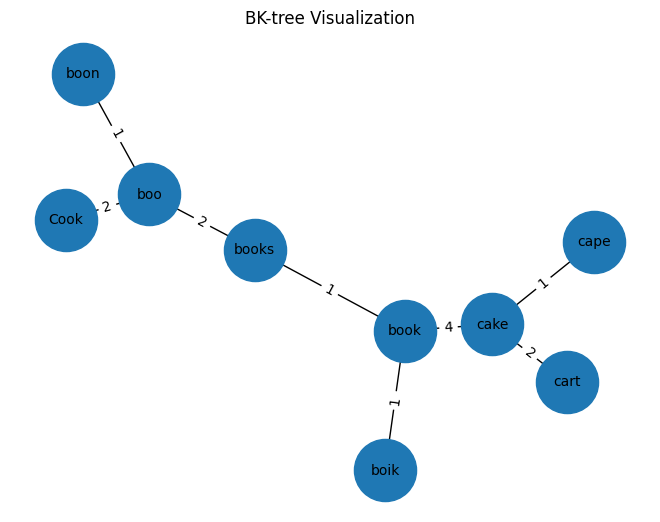

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a function to recursively generate the graph
def generate_graph(node, G):
    if node is None:
        return

    word = node.word
    G.add_node(word)

    for child_distance, child_node in node.children.items():
        child_word = child_node.word
        G.add_edge(word, child_word, weight=child_distance)
        generate_graph(child_node, G)

# Create a graph and add nodes and edges
G = nx.Graph()
generate_graph(bktree.root, G)

# Add the query word "boik" to the graph
query = "boik"
G.add_node(query)

# Calculate distances between the query word and its neighbors
neighbors = bktree.search(query, max_distance=1)
for neighbor, distance in neighbors:
    G.add_edge(query, neighbor, weight=distance)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_color="black")
edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("BK-tree Visualization")
plt.show()



## Feature Engineering

After text cleaning for each pair of questions, we extract the following features:

First Word Equal: Checks if the first word in both questions is the

1.   First Word Equal: Checks if the first word in both questions is the same.
2.   Common Words Ratio: Calculates the ratio of common words between the two questions.
3. Flesch Reading Ease (Question 1): Measures the readability of Question 1 using the Flesch Reading Ease formula.
4. Flesch Reading Ease (Question 2): Measures the readability of Question 2 using the Flesch Reading Ease formula.
5. Flesch Kincaid Grade (Question 1): Assesses the grade level required to understand Question 1 using the Flesch-Kincaid Grade Level formula.

6. Flesch Kincaid Grade (Question 2): Assesses the grade level required to understand Question 2 using the Flesch-Kincaid Grade Level formula.

The Flesch readability tests might be useful to measure similarity between pairs of questions.

In [ ]:
from textstat import flesch_reading_ease, flesch_kincaid_grade
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00


In [ ]:
# Function to extract features
def extract_features(question1, question2):
    # Extract first words of each question
    first_word_q1 = question1.split()[0].lower()
    first_word_q2 = question2.split()[0].lower()

    # Check if first words are equal
    first_word_equal = int(first_word_q1 == first_word_q2)

    # Tokenize questions
    tokens_q1 = word_tokenize(question1.lower())
    tokens_q2 = word_tokenize(question2.lower())

    # Calculate common words ratio
    common_words_ratio = len(set(tokens_q1) & set(tokens_q2)) / max(len(set(tokens_q1)), len(set(tokens_q2)))

    # Compute Flesch reading ease score and Flesch–Kincaid grade level
    flesch_score_q1 = flesch_reading_ease(question1)
    flesch_score_q2 = flesch_reading_ease(question2)
    flesch_grade_q1 = flesch_kincaid_grade(question1)
    flesch_grade_q2 = flesch_kincaid_grade(question2)

    return {
        'first_word_equal': first_word_equal,
        'common_words_ratio': common_words_ratio,
        'flesch_reading_ease_q1': flesch_score_q1,
        'flesch_reading_ease_q2': flesch_score_q2,
        'flesch_kincaid_grade_q1': flesch_grade_q1,
        'flesch_kincaid_grade_q2': flesch_grade_q2
    }

Here is an example of usage:

In [ ]:
question1 = "Cuuld you bring me      the coffie asap  please?"
question2 = "Could you please spiak a bit louder?"

# Cleaned text
cleaned_question1 = text_cleaning(question1)
cleaned_question2 = text_cleaning(question2)

features = extract_features(cleaned_question1, cleaned_question2)
print(features)

{'first_word_equal': 1, 'common_words_ratio': 0.3333333333333333, 'flesch_reading_ease_q1': 73.85, 'flesch_reading_ease_q2': 100.24, 'flesch_kincaid_grade_q1': 4.5, 'flesch_kincaid_grade_q2': 0.5}


## Implementation

The following function 'updatequestions' used in train_models.ipynb updates the dataframe X with the cleaned questions from questions_df, by merging the datasets by the question id.

In [ ]:
def updatequestions(questions_df, X,y):
    X = X.merge(questions_df, left_on='qid1', right_on='qid', how='left').drop(columns=['qid'])
    X = X.merge(questions_df, left_on='qid2', right_on='qid', how='left', suffixes=['_1', '_2']).drop(columns=['qid'])

    # replace the values in the question1 and question2 columns
    X['question1'] = X['question_1']
    X['question2'] = X['question_2']

    # drop the additional question_1 and question_2 columns
    X = X.drop(columns=['question_1', 'question_2'])

    # remove empty questions
    mask = (X['question1'].str.len() > 0) & (X['question2'].str.len() > 0)

    X = X[mask]
    y = y[mask]
    X.reset_index(drop=True, inplace=True)
    return X,y



The following function 'updateembeddings' used in train_models.ipynb updates the dataframe X with the embeddings of each question. Then it computes different distances between pairs of embeddings, which will be new features extracted. finally, the embeddings are removed.

In [ ]:
def updateembeddings(questions_df, X):
    X = X.merge(questions_df, left_on='qid1', right_on='qid', how='left').drop(columns=['qid'])
    X = X.merge(questions_df, left_on='qid2', right_on='qid', how='left', suffixes=['_1', '_2']).drop(columns=['qid'])
    # drop the question1 and question2 columns
    X = X.drop(columns=['question1', 'question2'])
    distances = X.apply(lambda row: distance_embeddings(row['embedding_1'], row['embedding_2'], row.name), axis=1)
    # Extract the individual distances from the resulting tuples
    X['cosine_distance'], X['euclidean_distance'], X['manhattan_distance'] = zip(*distances)
    # Remove the columns from the training set
    X = X.drop(columns=['embedding_1', 'embedding_2'])
    return X

The function print_results is used in reproduce_results.ipynb to plot the roc curve and print the confusion matrix and different scores.

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, classification_report

def print_results(model,X,y):
    y_proba=model.predict_proba(X)[:, 1]

    find_threshold(y_proba, y, plot_roc=True)

    y_pred=model.predict(X)

    cm = confusion_matrix(y,y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    print (classification_report(y,y_pred))

    accuracy = accuracy_score(y,y_pred)
    f1 = f1_score(y,y_pred, average='weighted')
    precision = precision_score(y,y_pred, average='weighted')
    recall = recall_score(y,y_pred, average='weighted')

    results = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
    return results